# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Monopoly game described in the Homework and for which you wrote a Markov chain model:

<img src="monopoly.png" width="300px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* The jail does not prevent the player from continuing to play. In other words, when landing on the “GO TO JAIL” cell, the player jumps back to the “JAIL” cell, but resumes play immediately.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import numpy.

**Note 2**: Make sure to print the result in the end.

---

In [8]:
import math
import numpy as np


##statesList= np.array(["GO", "VERMONT AVENUE", "JUST VISITING", 
##                    "VIRGINIA AVENUE", "FREE PARKING", "MARVIN GARDENS", 
##                      "GO TO JAIL", "JAIL", "PENNSYLVANIA AVENUE"])

statesList= np.array(["GO", "VM", "JV", 
                    "VA", "FP", "MG", 
                      "GTJ", "PA", "JAIL"])

                      
P= np.array([[0, 1./6, 1./6, 1./6, 1./6, 1./6, 1./6, 0, 0],  ## GO
             [0, 0, 1./6, 1./6, 1./6, 1./6, 1./6, 1./6, 0],  ## VM
             [1./6, 0, 0, 1./6, 1./6, 1./6, 1./6, 1./6, 0],  ## JV
             [1./6, 1./6, 0, 0, 1./6, 1./6, 1./6, 1./6, 0],  ## VA
             [1./6, 1./6, 1./6, 0, 0, 1./6, 1./6, 1./6, 0],  ## FP
             [1./6, 1./6, 1./6, 1./6, 0, 0, 1./6, 1./6, 0],  ## MG
             [0, 0, 0, 0, 0, 0, 0, 0, 1],  ## GTJ
             [1./6, 1./6, 1./6, 1./6, 1./6, 1./6, 0, 0, 0],  ## PA
             [1./6, 0, 0, 1./6, 1./6, 1./6, 1./6, 1./6, 0]])  ## JAIL

PInv= P.transpose()
print PInv

print statesList
print P



[[ 0.          0.          0.16666667  0.16666667  0.16666667  0.16666667
   0.          0.16666667  0.16666667]
 [ 0.16666667  0.          0.          0.16666667  0.16666667  0.16666667
   0.          0.16666667  0.        ]
 [ 0.16666667  0.16666667  0.          0.          0.16666667  0.16666667
   0.          0.16666667  0.        ]
 [ 0.16666667  0.16666667  0.16666667  0.          0.          0.16666667
   0.          0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.          0.          0.
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.          0.
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667
   0.          0.          0.16666667]
 [ 0.          0.16666667  0.16666667  0.16666667  0.16666667  0.16666667
   0.          0.          0.16666667]
 [ 0.          0.          0.          0.          0.          0.          1.
   0.          0.        ]]
['GO' 

---

#### Activity 2.

Compute the probability of the following trajectories:

* "COLLECT \$200" - "VERMONT AVENUE" - "GO TO JAIL" - "JAIL"
* "COLLECT \$200" - "GO TO JAIL" - "JAIL" - "COLLECT \$200"
* "COLLECT \$200" - "PENNSYLVANIA AVENUE" - "COLLECT \$200"

**Note:** Make sure to print the result in the end.

---

In [58]:
import numpy as np


initial= np.array([1, 0, 0, 0, 0, 0, 0, 0, 0])


P= np.array([[0, 1./6, 1./6, 1./6, 1./6, 1./6, 1./6, 0, 0],  ## GO
             [0, 0, 1./6, 1./6, 1./6, 1./6, 1./6, 1./6, 0],  ## VM
             [1./6, 0, 0, 1./6, 1./6, 1./6, 1./6, 1./6, 0],  ## JV
             [1./6, 1./6, 0, 0, 1./6, 1./6, 1./6, 1./6, 0],  ## VA
             [1./6, 1./6, 1./6, 0, 0, 1./6, 1./6, 1./6, 0],  ## FP
             [1./6, 1./6, 1./6, 1./6, 0, 0, 1./6, 1./6, 0],  ## MG
             [0, 0, 0, 0, 0, 0, 0, 0, 1],  ## GTJ
             [1./6, 1./6, 1./6, 1./6, 1./6, 1./6, 0, 0, 0],  ## PA
             [1./6, 0, 0, 1./6, 1./6, 1./6, 1./6, 1./6, 0]])  ## JAIL



#GO - VERMONT - GO TO JAIL - JAIL
GO_VM_GTL_JAIL = (initial[0])*(P[0][1])*(P[1][6])*(P[6][8])
print "COLLECT $200  - VERMONT AVENUE - GO TO JAIL - JAIL"
print GO_VM_GTL_JAIL


print "\n"
#GO-GTJ-JAIL-GO
GO_GTJ_JAIL_GO = (initial[0])*(P[0][6])*(P[6][8])*(P[8][0])
print "COLLECT $200 - GO TO JAIL - JAIL - COLLECT $200"
print GO_GTJ_JAIL_GO


print "\n"
#GO-PA-GO
GO_PA_GO = (initial[0])*(P[0][7])*(P[7][0])
print "COLLECT $200 - PENNSYLVANIA AVENUE - COLLECT $200"
print GO_PA_GO




COLLECT $200  - VERMONT AVENUE - GO TO JAIL - JAIL
0.0277777777778


COLLECT $200 - GO TO JAIL - JAIL - COLLECT $200
0.0277777777778


COLLECT $200 - PENNSYLVANIA AVENUE - COLLECT $200
0.0


### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

It is irreducible because we any state in the chain can be reached by any other state.
It is aperiodic because all states are aperiodic.
Since its both the above, it possesses a stationary distribution, and so is also ergonic.



---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [64]:
import numpy as np
import numpy.random as rnd 

##statesList=np.array(["GO", "VERMONT AVENUE", "JUST VISITING", 
##                   "VIRGINIA AVENUE", "FREE PARKING", "MARVIN GARDENS", 
##                     "GO TO JAIL", "PENNSYLVANIA AVENUE", "JAIL"])

statesList= np.array(["GO", "VM", "JV", 
                    "VA", "FP", "MG", 
                      "GTJ", "PA", "JAIL"])


count = 10000
position = 0
pathNames = ["GO"]
pathStates = [0]
while count >0 :
    nextpos= (position + rnd.randint(1, 7)) % 8
    ##print nextpos
    pathNames+= [statesList[nextpos]]
    pathStates+= [nextpos]
   
    if nextpos == 6:
        nextpos= 8
        pathNames+= [statesList[nextpos]]
        pathStates+= [nextpos]
        nextpos= 2
        
    position= nextpos
    count= count -1

print pathNames
print pathStates
    


['GO', 'FP', 'JV', 'GTJ', 'JAIL', 'PA', 'GO', 'VM', 'GTJ', 'JAIL', 'VA', 'GTJ', 'JAIL', 'PA', 'JV', 'FP', 'PA', 'JV', 'GTJ', 'JAIL', 'FP', 'VM', 'MG', 'JV', 'VA', 'VM', 'MG', 'VM', 'PA', 'JV', 'MG', 'PA', 'MG', 'VM', 'PA', 'FP', 'VM', 'PA', 'JV', 'GTJ', 'JAIL', 'PA', 'JV', 'VA', 'FP', 'GTJ', 'JAIL', 'GO', 'VA', 'FP', 'GO', 'GTJ', 'JAIL', 'GO', 'VA', 'GO', 'VM', 'PA', 'FP', 'GO', 'FP', 'VM', 'VA', 'VM', 'VA', 'MG', 'JV', 'PA', 'JV', 'PA', 'VA', 'FP', 'PA', 'VM', 'FP', 'PA', 'VA', 'GTJ', 'JAIL', 'FP', 'MG', 'VA', 'MG', 'VA', 'MG', 'VM', 'GTJ', 'JAIL', 'MG', 'VM', 'GTJ', 'JAIL', 'GTJ', 'JAIL', 'PA', 'VA', 'FP', 'VM', 'GTJ', 'JAIL', 'PA', 'VM', 'GTJ', 'JAIL', 'VA', 'GO', 'FP', 'MG', 'VM', 'MG', 'GTJ', 'JAIL', 'VA', 'MG', 'GO', 'VA', 'GO', 'VA', 'VM', 'PA', 'VA', 'GO', 'MG', 'VA', 'GTJ', 'JAIL', 'GTJ', 'JAIL', 'PA', 'JV', 'FP', 'JV', 'MG', 'VM', 'JV', 'FP', 'PA', 'GO', 'GTJ', 'JAIL', 'FP', 'JV', 'MG', 'GTJ', 'JAIL', 'FP', 'GTJ', 'JAIL', 'PA', 'VA', 'VM', 'GTJ', 'JAIL', 'GO', 'VM', 'VA', 'PA

---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Compare the relative frequencies with the result of Activity #4.

---

(array([1274, 1073, 1059, 1287, 1219, 1431, 1469, 1189, 1469], dtype=int64), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


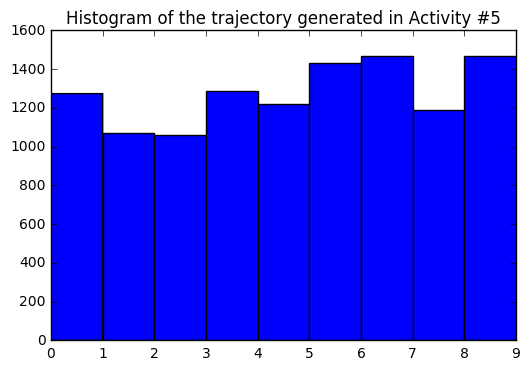

In [65]:
import numpy as np
import matplotlib.pyplot as plt

histogram= np.histogram( pathStates, bins= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print histogram

plt.hist(pathStates, bins= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.title("Histogram of the trajectory generated in Activity #5")
plt.show()




[Provide your answer here]